In [1]:
!pip install hvplot
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 5.7 MB/s eta 0:00:00


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("/content/drive/MyDrive/M11_Starter_Code_Boot_Camp/Starter_Code/Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

Mounted at /content/drive


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Step 2: Normalize the data
def normalize_data(data):
    """Normalize the data using StandardScaler."""
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
    return scaled_df


In [5]:
# Create a DataFrame with the scaled data
scaled_df = normalize_data(market_data_df)
# Copy the crypto names from the original data
crypto_names = market_data_df.index.tolist()
# Display sample data
print("Sample Data:")
print(market_data_df.head(10))


Sample Data:
                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d 

### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(market_data_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(k_values),
    "inertia": inertia
}


# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {
    "k": list(k_values),
    "inertia": inertia
}
elbow_df = pd.DataFrame(elbow_data)
# Display the DataFrame
# Display the Elbow DataFrame
print("Elbow DataFrame:")
print(elbow_df)

Elbow DataFrame:
     k       inertia
0    1  6.998354e+07
1    2  8.193204e+06
2    3  2.792811e+06
3    4  8.352274e+05
4    5  4.373295e+05
5    6  2.721565e+05
6    7  2.132252e+05
7    8  1.742797e+05
8    9  1.360407e+05
9   10  9.936461e+04
10  11  7.366139e+04


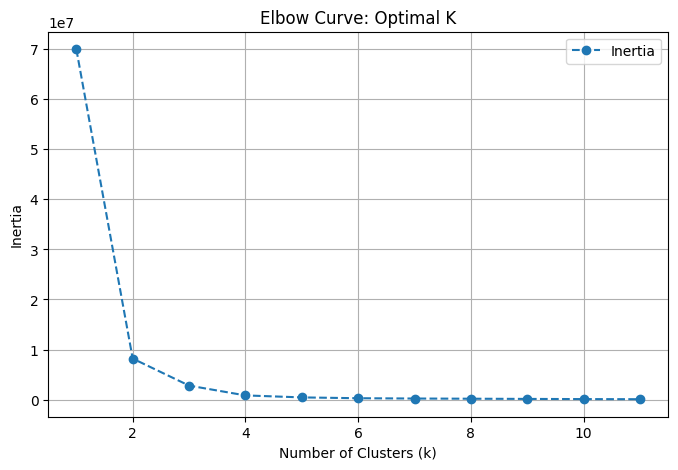

In [7]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='--', label='Inertia')
plt.title('Elbow Curve: Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.legend()
plt.show()

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:**
The best value is k = 3

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
best_k = 3  # Based on the Elbow Curve analysis
kmeans_model = KMeans(n_clusters=best_k, random_state=1)

In [9]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(market_data_df)

KMeans(n_clusters=3, random_state=1)

In [10]:
# Define the cluster_data function
def cluster_data(data, n_clusters):
    """Cluster the data using KMeans."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    clusters = kmeans.fit_predict(data)
    return clusters


# Predict the clusters to group the cryptocurrencies using the scaled data
best_k = 3  # Based on the Elbow Curve analysis
clusters = cluster_data(market_data_df, best_k)

# View the resulting array of cluster values.
print("Cluster Values Array:")
print(clusters)

Cluster Values Array:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 0 2
 0 0 0 0]


In [11]:
# Create a copy of the DataFrame
# Create a copy of the DataFrame
clustered_data = market_data_df.copy()


In [12]:
# Add a new column to the DataFrame with the predicted clusters
clustered_data['Cluster'] = clusters

# Display sample data
print("Clustered Data with Cluster Labels:")
print(clustered_data.head())

Clustered Data with Cluster Labels:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-

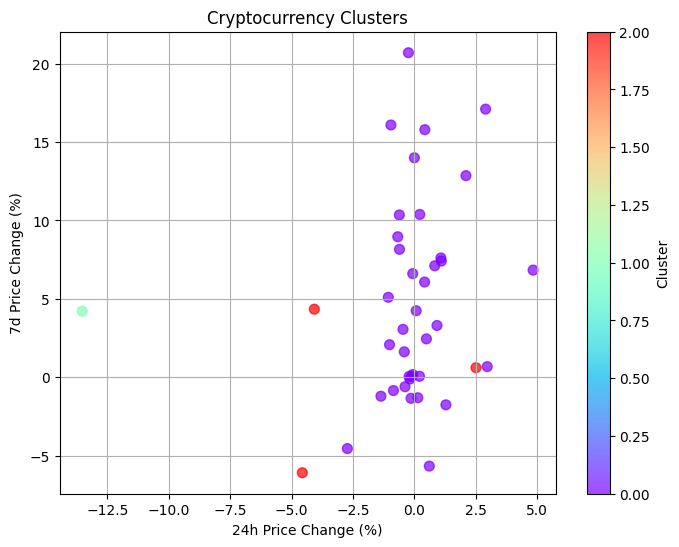

In [16]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
# Scatter plot using Matplotlib
plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    clustered_data['price_change_percentage_24h'],
    clustered_data['price_change_percentage_7d'],
    c=clustered_data['Cluster'],  # Use cluster labels for color
    cmap='rainbow',  # Color map for better visualization
    alpha=0.7,  # Transparency
    s=50  # Marker size
)

plt.title("Cryptocurrency Clusters")
plt.xlabel("24h Price Change (%)")
plt.ylabel("7d Price Change (%)")
plt.colorbar(scatter, label="Cluster")
plt.grid()
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Step 5: Apply PCA for dimensionality reduction
def apply_pca(data, n_components):
    """Apply PCA to reduce dimensions."""
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(data)
    pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)], index=data.index)
    explained_variance = pca.explained_variance_ratio_
    return pca, pca_df, explained_variance

# Use the PCA model with fit_transform on the original scaled DataFrame to reduce to three principal components
pca_data = pca.fit_transform(market_data_df)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=market_data_df.index)
# Display the first five rows of the PCA DataFrame
print("First Five Rows of PCA DataFrame:")
print(pca_df.head())




First Five Rows of PCA DataFrame:
                     PC1         PC2        PC3
coin_id                                        
bitcoin      -341.800963  -51.366775  12.525471
ethereum     -249.420466   24.117548 -14.231466
tether       -402.614721 -118.710737  24.838397
ripple       -406.752437  -79.487286   1.566331
bitcoin-cash -382.429948 -103.431959  16.753073


In [19]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_  # Access the explained variance ratio

# Display the explained variance
print("Explained Variance Ratio (Each Component):", explained_variance)


Explained Variance Ratio (Each Component): [9.76037313e-01 2.30282949e-02 7.48308214e-04]


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance = 0.999814

In [20]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
    pca_data,
    columns=['PC1', 'PC2', 'PC3'],
    index=market_data_df.index
)

# Copy the crypto names from the original data
pca_df['crypto_name'] = crypto_names

# Set the coinid column as index
pca_df.index.name = "coin_id"

# Display sample data
print("PCA DataFrame with Crypto Names:")
print(pca_df.head())

PCA DataFrame with Crypto Names:
                     PC1         PC2        PC3   crypto_name
coin_id                                                      
bitcoin      -341.800963  -51.366775  12.525471       bitcoin
ethereum     -249.420466   24.117548 -14.231466      ethereum
tether       -402.614721 -118.710737  24.838397        tether
ripple       -406.752437  -79.487286   1.566331        ripple
bitcoin-cash -382.429948 -103.431959  16.753073  bitcoin-cash


### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# Define the range of k-values to try
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']])  # Use only PCA components
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(k_values),
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print("Elbow DataFrame:")
print(elbow_df)

Elbow DataFrame:
     k       inertia
0    1  6.997052e+07
1    2  8.180192e+06
2    3  2.779901e+06
3    4  8.237471e+05
4    5  4.264175e+05
5    6  2.615079e+05
6    7  2.027058e+05
7    8  1.635232e+05
8    9  1.253996e+05
9   10  8.933120e+04
10  11  6.620848e+04


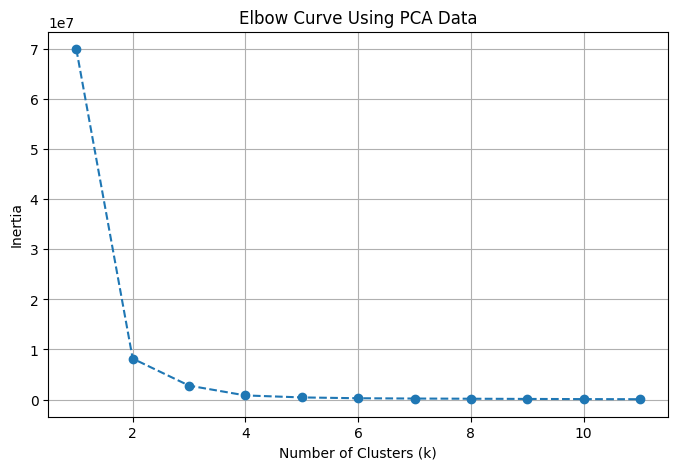

In [22]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='--')
plt.title('Elbow Curve Using PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it is not different

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [23]:
# Initialize the K-Means model using the best value for k
best_k = 3  # Based on the Elbow Curve analysis
kmeans_pca = KMeans(n_clusters=best_k, random_state=1)

In [24]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df[['PC1', 'PC2', 'PC3']])

KMeans(n_clusters=3, random_state=1)

In [25]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_values = kmeans_pca.predict(pca_df[['PC1', 'PC2', 'PC3']])
# Print the resulting array of cluster values
print("Array of Predicted Cluster Values:")
print(cluster_values)


Array of Predicted Cluster Values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 0 2
 0 0 0 0]


In [26]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df['Cluster'] = kmeans_pca.predict(pca_df[['PC1', 'PC2', 'PC3']])

# Display sample data
print("Clustered PCA DataFrame with Cluster Labels:")
print(clustered_pca_df.head())

Clustered PCA DataFrame with Cluster Labels:
                     PC1         PC2        PC3   crypto_name  Cluster
coin_id                                                               
bitcoin      -341.800963  -51.366775  12.525471       bitcoin        0
ethereum     -249.420466   24.117548 -14.231466      ethereum        0
tether       -402.614721 -118.710737  24.838397        tether        0
ripple       -406.752437  -79.487286   1.566331        ripple        0
bitcoin-cash -382.429948 -103.431959  16.753073  bitcoin-cash        0


In [27]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
# Create a scatter plot using hvPlot
scatter_plot = clustered_pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",
    cmap="Category10",
    size=100,
    alpha=0.7,
    title="Cryptocurrency Clusters (PCA)"
)

# Display the scatter plot
scatter_plot


:Scatter   [PC1]   (PC2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [28]:
# Use the columns from the original scaled DataFrame as the index.
# Step 7: Determine the Weights of Each Feature on Each Principal Component

# Create a DataFrame showing the weights of each feature for each principal component
feature_weights = pd.DataFrame(
    pca.components_,
    columns=market_data_df.columns,
    index=['PC1', 'PC2', 'PC3']
)

# Display the weights for each feature
print("Feature Weights for Each Principal Component:")
print(feature_weights)

# Determine the strongest positive and negative influence for each component
for component in feature_weights.index:
    strongest_positive = feature_weights.loc[component].idxmax()
    strongest_negative = feature_weights.loc[component].idxmin()
    print(f"{component}: Strongest Positive Influence: {strongest_positive}, Value: {feature_weights.loc[component, strongest_positive]}")
    print(f"{component}: Strongest Negative Influence: {strongest_negative}, Value: {feature_weights.loc[component, strongest_negative]}")


Feature Weights for Each Principal Component:
     price_change_percentage_24h  price_change_percentage_7d  \
PC1                    -0.001521                   -0.000197   
PC2                     0.003933                   -0.001289   
PC3                     0.013938                   -0.016462   

     price_change_percentage_14d  price_change_percentage_30d  \
PC1                    -0.000705                     0.000955   
PC2                     0.006577                     0.087961   
PC3                     0.126844                     0.377659   

     price_change_percentage_60d  price_change_percentage_200d  \
PC1                     0.008795                      0.300266   
PC2                     0.158367                      0.937599   
PC3                     0.899181                     -0.173684   

     price_change_percentage_1y  
PC1                    0.953813  
PC2                   -0.296700  
PC3                    0.046120  
PC1: Strongest Positive Influence: 

#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:**
**PC1 (Principal Component 1)**:

Strongest Positive Influence:

price_change_percentage_1y (Value: 0.9538)
This indicates that the 1-year price change has the most significant positive contribution to this component.

Strongest Negative Influence:

price_change_percentage_24h (Value: -0.0015)
The 24-hour price change has a negligible but most negative influence.

PC2 (Principal Component 2):

Strongest Positive Influence:

price_change_percentage_200d (Value: 0.9376)
The 200-day price change has the most significant positive impact on this component.

Strongest Negative Influence:

price_change_percentage_1y (Value: -0.2967)
The 1-year price change negatively contributes to this component.


PC3 (Principal Component 3):

Strongest Positive Influence:

price_change_percentage_60d (Value: 0.8992)
The 60-day price change has the most significant positive contribution to this component.

Strongest Negative Influence:

price_change_percentage_200d (Value: -0.1737)
The 200-day price change has a noticeable negative impact on this component.